# 相関係数

## ピアソンの積率相関係数

$$
r=\frac{\sum\left(x_i-\bar{x}\right)\left(y_i-\bar{y}\right)}{\sqrt{\sum\left(x_i-\bar{x}\right)^2 \sum\left(y_i-\bar{y}\right)^2}}
$$

- $r$：相関係数。$r\in[-1,1]$
- $x_i$：標本における変数$x$の値
- $\bar{x}$：変数$x$の値の平均
- $y_i$：標本における変数$y$の値
- $\bar{y}$：変数$y$の値の平均


### どうやって$[-1,1]$の範囲に収まるよう正規化しているのか？

内積$\langle \boldsymbol{a}, \boldsymbol{b} \rangle$とノルム$\|\cdot\|$ についての **コーシー・シュワルツの不等式** 

$$
\begin{aligned}
& | \langle \boldsymbol{a}, \boldsymbol{b} \rangle |
\leq
\| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|
\\
\iff &
- \| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|
\leq 
\langle \boldsymbol{a}, \boldsymbol{b} \rangle
\leq
\| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|
\\
\iff &
- 1 \leq 
\frac{\langle \boldsymbol{a}, \boldsymbol{b} \rangle}{\| \boldsymbol{a} \| \cdot \| \boldsymbol{b} \|}
\leq 1
\end{aligned}
$$

を応用する。

$\langle \boldsymbol{a}, \boldsymbol{b} \rangle$ を確率変数$A,B$の積の期待値 $E[A B]$ に置き換え、ノルムを$E[A^2], E[B^2]$に置き換えた

$$
|E[A B]|^2 \leq E[A^2] E[B^2]
$$

を用いる。

$$
A = E[X - E[X]],\quad
B = E[Y - E[Y]]
$$

とおくと

$$
\begin{aligned}
\big| E\big[ E[X - E[X]] \cdot E[Y - E[Y]] \big] \big|^2
\leq E[(E[X - E[X]])^2] E[(E[Y - E[Y]])^2]\\
\iff
| \operatorname{Cov}(X, Y) |^2
\leq \operatorname{Var}(X) \operatorname{Var}(Y)
\\
\iff
-1 \leq
\frac{ \operatorname{Cov}(X, Y) }{ \sqrt{ \operatorname{Var}(X) } \sqrt{ \operatorname{Var}(Y) } }
\leq 1
\end{aligned}
$$


## 注意点

データの関係性をざっくり表すのが相関係数の良さだが、散布図でみると全然異なるデータであってもたまたま同じ相関係数になることがある。また外れ値にひっぱられる特性もある。

下の図はアンスコムの例と呼ばれる、線形回帰をしたときに同じ傾き係数になるデータセット。
相関係数だと線形回帰と違って切片部分がないため係数は若干異なるがだいたい同じになる。

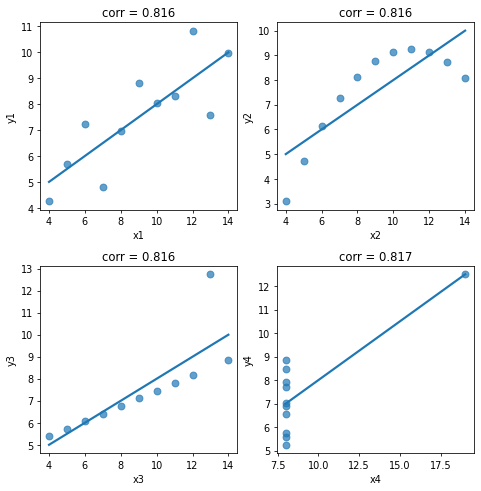

In [53]:
import statsmodels.api as sm
import pandas as pd
anscombe = sm.datasets.get_rdataset("anscombe").data

import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=[8,8], dpi=70)
axes = axes.flatten()
fig.subplots_adjust(hspace=0.3)
for i in range(4):
    corr = anscombe.filter(regex=f"{i+1}").corr().iloc[0,1]
    sns.regplot(data=anscombe, x=f"x{i+1}", y=f"y{i+1}", ax=axes[i],
                ci=None, scatter_kws={"s": 50, "alpha": 0.7})
    axes[i].set(title=f"corr = {corr:.3f}")